# Exploring Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

In [2]:
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
## Suppose we want to access three different elements. We could do it like this:

[x[3], x[7], x[2]]

[71, 86, 14]

In [4]:
## Alternatively, we can pass a single list or array of indices to obtain the same result:

ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [5]:
## the shape of the result reflects the shape of the index arrays

ind = np.array([[3, 7],
                [4, 5]])

In [6]:
x[ind]

array([[71, 86],
       [60, 20]])

In [7]:
## Fancy indexing also works in multiple dimensions

X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [9]:
## if we combine a column vector and a row vector within the indices, we
## get a two-dimensional result:

X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [10]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Combined Indexing

In [12]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [13]:
## We can combine fancy and simple indices:

X[2, [2, 0, 1]]

array([10,  8,  9])

In [14]:
## We can also combine fancy indexing with slicing:

X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [15]:
## And we can combine fancy indexing with masking:

mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

#### Example: Selecting Random Points

In [16]:
mean = [0, 0]
cov = [[1, 2],
[2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

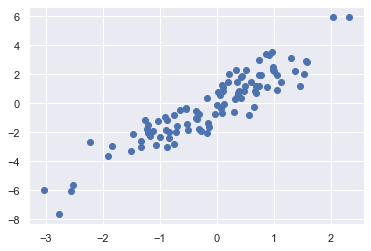

In [18]:
plt.scatter(X[:, 0], X[:, 1]);

In [20]:
## Let’s use fancy indexing to select 20 random points.

indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([46, 72,  4, 37, 65, 67, 11, 18, 61, 92, 44, 47, 71, 39, 80, 89, 66,
       31, 93, 62])

In [21]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

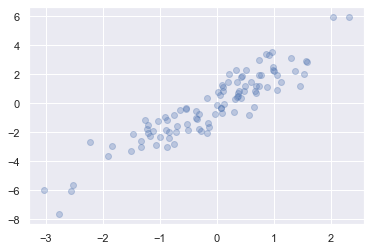

In [22]:
## Now to see which points were selected, let’s over-plot large circles at the locations of
# the selected points

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
facecolor='none', s=200);

### Modifying Values with Fancy Indexing

In [23]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [24]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [25]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [27]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


### Example: Binning Data

In [28]:
np.random.seed(42)
x = np.random.randn(100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# find the appropriate bin for each x
i = np.searchsorted(bins, x)
# add 1 to each of these bins
np.add.at(counts, i, 1)

ValueError: 'step' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

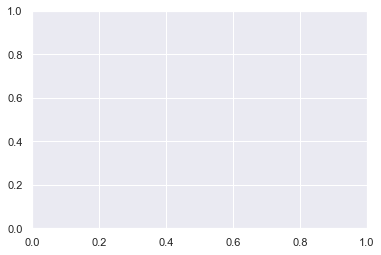

In [33]:
# plot the results
plt.plot(bins, counts, linestyle='step');

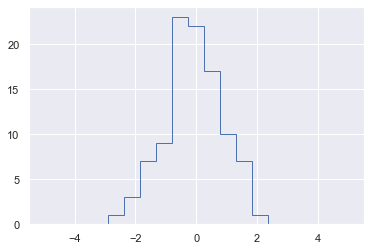

In [31]:
plt.hist(x, bins, histtype='step');

In [34]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

NumPy routine:
25.8 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [35]:
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom routine:
12.3 µs ± 67.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
55.4 ms ± 883 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
91.8 ms ± 347 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
